In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
data_path = '../data_1_8/'

In [53]:
df = pd.read_csv(path.join('../data_1_8/', 'for_framingham/processed/merged_framingham2.csv'))
df.shape

(170658, 24)

In [54]:
df.head()

,GRID,GENDER,Original_RACE,DOB,FIRST_CVD_DATE,BASELINE,AGE,FIRST_VISIT,LAST_VISIT,DURATION_BF_BASELINE,...,RECENT_VALUE_HDL-C,HTN_DRUG_CNT,T2DM_CNT,Smoking,VISITS_CNT,PHECODES_CNT,CLASS,frs,risk,predict
0,R290108078,M,W,1949,6/1/08,12/1/07,58,00:00.0,30:00.0,2897,...,42.0,0,0,1,1,1,0,61.692284,0.138744,1
1,R240692237,M,W,1932,3/7/17,9/7/16,84,00:00.0,15:00.0,1947,...,46.0,1,0,0,102,37,0,63.189230,0.486937,1
2,R277435259,F,W,1951,2/2/14,8/2/13,62,00:00.0,24:00.0,2675,...,56.0,1,0,0,41,13,1,-28.393660,0.072075,0
3,R269880338,F,W,1956,4/4/17,10/4/16,60,01:01.0,15:00.0,9121,...,81.0,1,0,1,43,43,0,-28.563913,0.061144,0
4,R272530184,M,W,1965,9/7/16,3/7/16,51,00:00.0,39:00.0,4272,...,63.0,1,0,0,23,19,0,60.505905,0.044580,0


In [55]:
df_remove_age = pd.read_csv(path.join('../data_1_8/', 'for_framingham/processed/merged_fr_results_remove_age.csv'))
print(df_remove_age.shape)
df_remove_age = df_remove_age[['GRID','frs']]
df_remove_age.rename(columns={'frs':'frs_remove_age'},inplace=True)
df_remove_age.head()

(170658, 22)


,GRID,frs_remove_age
0,R290108078,40.590374
1,R240692237,41.201364
2,R277435259,27.049878
3,R269880338,32.227862
4,R272530184,40.647531


In [58]:
df_merged = df.merge(df_remove_age)
df_merged.shape

(170658, 25)

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


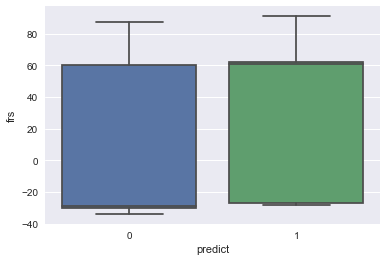

In [59]:
#original cohort
sns.boxplot(y='frs', x ='predict', data=df)

In [70]:
df[df['predict']==1]['frs'].mean()

24.092727111745678

In [71]:
df[df['predict']==0]['frs'].mean()

7.51827481951186

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


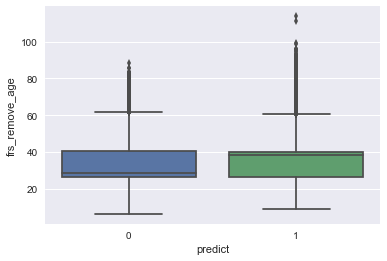

In [61]:
#remove age overal
sns.boxplot(y='frs_remove_age', x ='predict', data=df_merged)

In [42]:
df_merged[df_merged['predict']==1]['frs_remove_age'].mean()

35.61229881193719

In [43]:
df_merged[df_merged['predict']==0]['frs_remove_age'].mean()

34.181651772196105

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


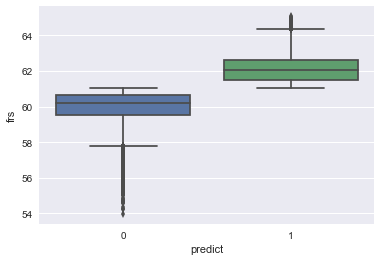

In [65]:
#original cohort white man
sns.boxplot(y='frs', x ='predict', data=df[(df['GENDER']=='M') & (df['RACE']=='W')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


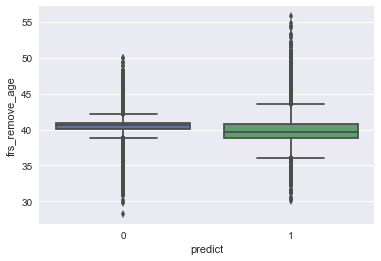

In [66]:
#remove age white man
sns.boxplot(y='frs_remove_age', x ='predict', data=df_merged[(df_merged['GENDER']=='M') & (df_merged['RACE']=='W')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


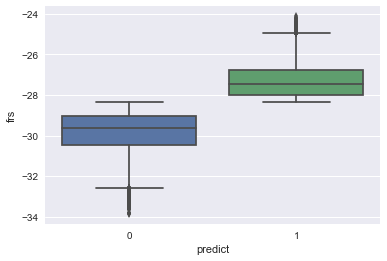

In [67]:
#original white women
sns.boxplot(y='frs', x ='predict', data=df[(df['GENDER']=='F') & (df['RACE']=='W')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


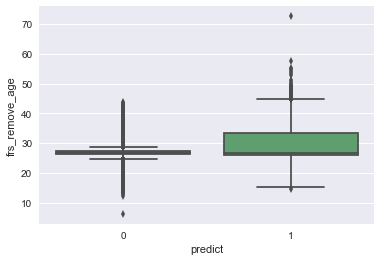

In [46]:
#remove age white women
sns.boxplot(y='frs_remove_age', x ='predict', data=df_merged[(df_merged['GENDER']=='F') & (df_merged['RACE']=='W')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


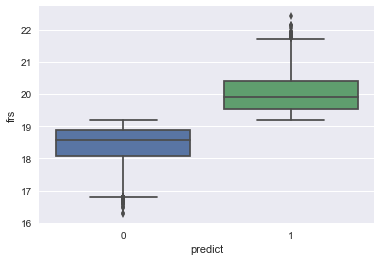

In [28]:
#orginal black man
sns.boxplot(y='frs', x ='predict', data=df[(df['GENDER']=='M') & (df['RACE']=='B')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


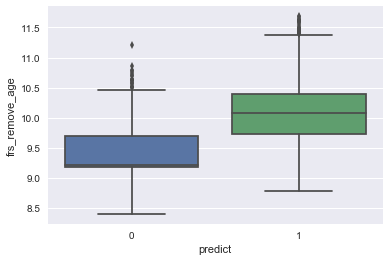

In [45]:
#remove age black man
sns.boxplot(y='frs_remove_age', x ='predict', data=df_merged[(df_merged['GENDER']=='M') & (df_merged['RACE']=='B')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


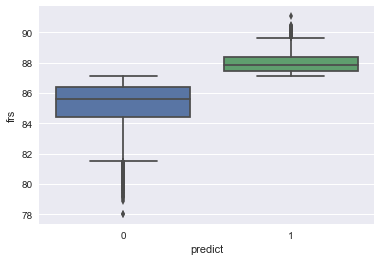

In [30]:
#orginal black women
sns.boxplot(y='frs', x ='predict', data=df[(df['GENDER']=='F') & (df['RACE']=='B')])

/Users/juan/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


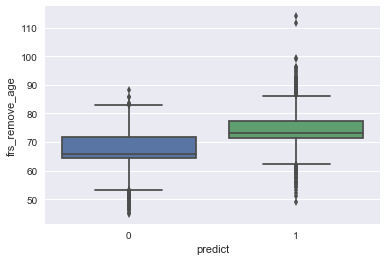

In [47]:
#orginal black men
sns.boxplot(y='frs_remove_age', x ='predict', data=df_merged[(df_merged['GENDER']=='F') & (df_merged['RACE']=='B')])